# ${\bullet}$Analysis of La Liga

#### Information needed: Teams and matches related to Spain

In [1]:
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt

In [90]:
team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [91]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
team=team[:98]
team

,city,name,wyId,officialName,type,name,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


In [92]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


In [5]:
#As this is La liga, we need information solely based on Spain.
team_esp=team[(team['alpha3code']=='ESP')&(team['type']=='club')]
team_esp

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES
10,Madrid,Atl\u00e9tico Madrid,679,Club Atl\u00e9tico de Madrid,club,Spain,724,ESP,ES
13,Valencia,Valencia,674,Valencia Club de F\u00fatbol,club,Spain,724,ESP,ES
14,Madrid,Real Madrid,675,Real Madrid Club de F\u00fatbol,club,Spain,724,ESP,ES
15,Barcelona,Barcelona,676,FC Barcelona,club,Spain,724,ESP,ES


In [6]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_esp=team_esp.reset_index(drop=True)
team_esp

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
1,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
2,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
3,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
4,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
5,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES
6,Madrid,Atl\u00e9tico Madrid,679,Club Atl\u00e9tico de Madrid,club,Spain,724,ESP,ES
7,Valencia,Valencia,674,Valencia Club de F\u00fatbol,club,Spain,724,ESP,ES
8,Madrid,Real Madrid,675,Real Madrid Club de F\u00fatbol,club,Spain,724,ESP,ES
9,Barcelona,Barcelona,676,FC Barcelona,club,Spain,724,ESP,ES


In [7]:
matches_esp= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Spain.json')
pd.set_option('display.max_columns', 14)
matches_esp

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406122,38,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",181144,2018-05-20 18:45:00,676,Camp Nou,2565922,"Barcelona - Real Sociedad, 1 - 0","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 398931, 'role': 'referee'}, {'r...",Regular,795
1,Played,4406122,38,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",181144,2018-05-20 16:30:00,0,Estadio Wanda Metropolitano,2565925,"Atl\u00e9tico Madrid - Eibar, 2 - 2","May 20, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",Regular,795
2,Played,4406122,38,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",181144,2018-05-20 14:15:00,691,San Mam\u00e9s Barria,2565919,"Athletic Club - Espanyol, 0 - 1","May 20, 2018 at 4:15:00 PM GMT+2","[{'refereeId': 384957, 'role': 'referee'}, {'r...",Regular,795
3,Played,4406122,38,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2018-05-20 10:00:00,674,Estadio de Mestalla,2565924,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","May 20, 2018 at 12:00:00 PM GMT+2","[{'refereeId': 398913, 'role': 'referee'}, {'r...",Regular,795
4,Played,4406122,38,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-19 18:45:00,0,Estadio de la Cer\u00e1mica,2565927,"Villarreal - Real Madrid, 2 - 2","May 19, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",Regular,795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4406122,1,"{'691': {'scoreET': 0, 'coachId': 169425, 'sid...",181144,2017-08-19 20:15:00,0,Estadio Ram\u00f3n S\u00e1nchez Pizju\u00e1n,2565552,"Sevilla - Espanyol, 1 - 1","August 19, 2017 at 10:15:00 PM GMT+2","[{'refereeId': 378950, 'role': 'referee'}, {'r...",Regular,795
376,Played,4406122,1,"{'756': {'scoreET': 0, 'coachId': 167044, 'sid...",181144,2017-08-19 18:15:00,0,Estadi Municipal de Montilivi,2565551,"Girona - Atl\u00e9tico Madrid, 2 - 2","August 19, 2017 at 8:15:00 PM GMT+2","[{'refereeId': 378994, 'role': 'referee'}, {'r...",Regular,795
377,Played,4406122,1,"{'692': {'scoreET': 0, 'coachId': 3880, 'side'...",181144,2017-08-19 16:15:00,687,Estadio de Bala\u00eddos,2565549,"Celta de Vigo - Real Sociedad, 2 - 3","August 19, 2017 at 6:15:00 PM GMT+2","[{'refereeId': 384946, 'role': 'referee'}, {'r...",Regular,795
378,Played,4406122,1,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2017-08-18 20:15:00,674,Estadio de Mestalla,2565556,"Valencia - Las Palmas, 1 - 0","August 18, 2017 at 10:15:00 PM GMT+2","[{'refereeId': 381927, 'role': 'referee'}, {'r...",Regular,795


In [8]:
results_esp = matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_esp
# results.columns = ['result_home','result_away']
results_esp = pd.concat([matches_esp['gameweek'],results_esp,matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_esp.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_esp

,gameweek,goal_home,goal_away,team_home,team_away
0,38,1,0,Barcelona,Real Sociedad
1,38,2,2,Atl\u00e9tico Madrid,Eibar
2,38,0,1,Athletic Club,Espanyol
3,38,2,1,Valencia,Deportivo La Coru\u00f1a
4,38,2,2,Villarreal,Real Madrid
...,...,...,...,...,...
375,1,1,1,Sevilla,Espanyol
376,1,2,2,Girona,Atl\u00e9tico Madrid
377,1,2,3,Celta de Vigo,Real Sociedad
378,1,1,0,Valencia,Las Palmas


In [9]:
results_esp['points_home'] = 0
results_esp['points_away'] = 0
for i in range(results_esp.shape[0]):
    if results_esp.loc[i,'goal_home']>results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_home']=3
    elif results_esp.loc[i,'goal_home']<results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_away']=3
    else:
        results_esp.loc[i,'points_home']=1
        results_esp.loc[i,'points_away']=1

In [10]:
home = results_esp[['gameweek','team_home','points_home']]
away = results_esp[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_esp = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_esp
# away

,gameweek,team,points
0,1,Athletic Club,1
1,1,Atl\u00e9tico Madrid,1
2,1,Barcelona,3
3,1,Celta de Vigo,0
4,1,Deportivo Alav\u00e9s,0
...,...,...,...
755,38,Real Madrid,1
756,38,Real Sociedad,0
757,38,Sevilla,3
758,38,Valencia,3


In [11]:
team_list = list(points_table_esp.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_esp.loc[(points_table_esp['gameweek']==week)&(points_table_esp['team']==team),'points'])
table_esp=points_byweek
table_esp=table_esp.sort_values(by=(38),ascending=False)
table_esp=table_esp.T
pd.set_option('display.max_columns', 20)
table_esp

,Barcelona,Atl\u00e9tico Madrid,Real Madrid,Valencia,Villarreal,Real Betis,Sevilla,Getafe,Eibar,Girona,Celta de Vigo,Espanyol,Real Sociedad,Deportivo Alav\u00e9s,Levante,Athletic Club,Legan\u00e9s,Deportivo La Coru\u00f1a,Las Palmas,M\u00e1laga
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,3,3,0,0,1,1,3,1,0,1,3,0,3,1,3,0,0,0
2,6,4,4,4,0,3,4,1,3,4,0,1,6,0,4,4,6,1,0,0
3,9,5,5,5,3,3,7,4,3,4,3,1,9,0,5,7,6,1,3,0
4,12,8,8,6,6,6,10,4,6,4,3,4,9,0,6,7,6,1,6,0
5,15,11,8,9,7,9,13,5,6,5,4,5,9,0,9,7,7,4,6,0
6,18,14,11,12,7,12,13,8,6,5,7,8,9,0,9,8,10,4,6,1
7,21,15,14,15,10,13,16,8,6,6,8,8,10,3,9,8,11,7,6,1
8,22,16,17,18,13,13,16,8,7,6,11,9,13,3,10,11,14,8,6,1
9,25,19,20,21,16,16,16,9,7,9,11,10,14,3,11,11,17,8,6,1


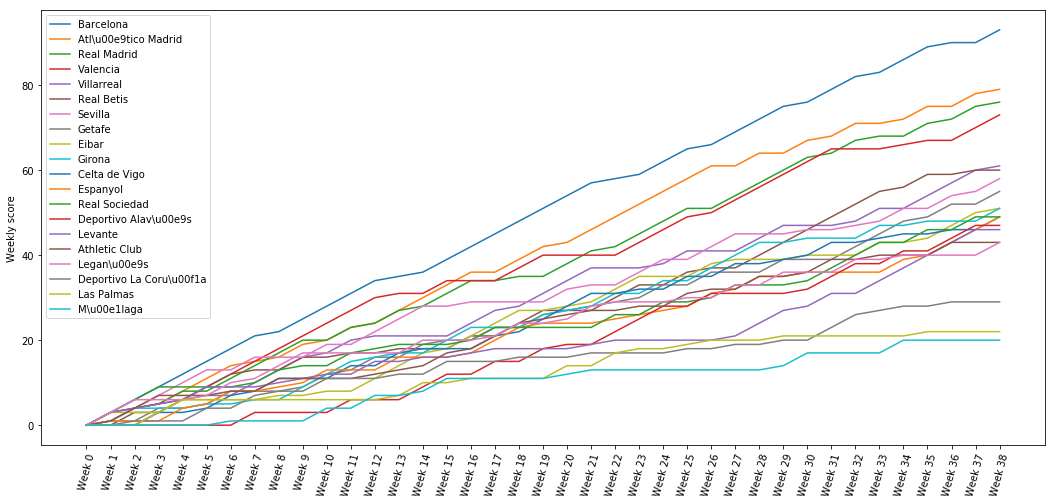

In [13]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,8))
fig=plt.plot(week,table_esp)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_esp.columns,loc='upper left',fontsize='medium')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [14]:
rest={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [15]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
18,Valencia,8
2,Barcelona,7
14,Real Betis,6
1,Atl\u00e9tico Madrid,6
12,Levante,5
17,Sevilla,4
15,Real Madrid,4
19,Villarreal,3
3,Celta de Vigo,3
4,Deportivo Alav\u00e9s,3


In [18]:
result={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [19]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
10,Las Palmas,8
13,M\u00e1laga,7
4,Deportivo Alav\u00e9s,6
11,Legan\u00e9s,4
16,Real Sociedad,4
12,Levante,4
18,Valencia,3
17,Sevilla,3
0,Athletic Club,3
7,Espanyol,3


### From the data and the plot we can see that the team which has the longest winning streak is Valncia. Valencia made a winning chain of 8 matches. On the other hand, the  team with highest losing streak is Las Palmas.

# ${\bullet}$Analysis for Bundesliga

#### Information needed: Teams and matches related to Germany

In [24]:
#As this is Bundesliga, we need information solely based on Germany.
team_ger=team[(team['alpha3code']=='DEU')&(team['type']=='club')]
team_ger

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
28,Bremen,Werder Bremen,2443,SV Werder Bremen,club,Germany,276,DEU,DE
29,Leverkusen,Bayer Leverkusen,2446,TSV Bayer 04 Leverkusen,club,Germany,276,DEU,DE
30,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE
31,M\u00fcnchen,Bayern M\u00fcnchen,2444,FC Bayern M\u00fcnchen,club,Germany,276,DEU,DE
32,Stuttgart,Stuttgart,2445,VfB Stuttgart 1893,club,Germany,276,DEU,DE
33,Gelsenkirchen,Schalke 04,2449,FC Schalke 04,club,Germany,276,DEU,DE
41,Hannover,Hannover 96,2455,Hannover 96,club,Germany,276,DEU,DE
43,Berlin,Hertha BSC,2457,Hertha BSC,club,Germany,276,DEU,DE
44,Wolfsburg,Wolfsburg,2451,VfL Wolfsburg,club,Germany,276,DEU,DE


In [25]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ger=team_ger.reset_index(drop=True)
team_ger

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
1,Bremen,Werder Bremen,2443,SV Werder Bremen,club,Germany,276,DEU,DE
2,Leverkusen,Bayer Leverkusen,2446,TSV Bayer 04 Leverkusen,club,Germany,276,DEU,DE
3,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE
4,M\u00fcnchen,Bayern M\u00fcnchen,2444,FC Bayern M\u00fcnchen,club,Germany,276,DEU,DE
5,Stuttgart,Stuttgart,2445,VfB Stuttgart 1893,club,Germany,276,DEU,DE
6,Gelsenkirchen,Schalke 04,2449,FC Schalke 04,club,Germany,276,DEU,DE
7,Hannover,Hannover 96,2455,Hannover 96,club,Germany,276,DEU,DE
8,Berlin,Hertha BSC,2457,Hertha BSC,club,Germany,276,DEU,DE
9,Wolfsburg,Wolfsburg,2451,VfL Wolfsburg,club,Germany,276,DEU,DE


#### Import the matches data for germany

In [26]:
matches_ger= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Germany.json')
pd.set_option('display.max_columns', 14)
matches_ger

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426
1,Played,4405517,34,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",181137,2018-05-12 13:30:00,2482,WIRSOL Rhein-Neckar-Arena,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 384936, 'role': 'referee'}, {'r...",Regular,426
2,Played,4405517,34,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",181137,2018-05-12 13:30:00,2975,Olympiastadion Berlin,2517038,"Hertha BSC - RB Leipzig, 2 - 6","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387276, 'role': 'referee'}, {'r...",Regular,426
3,Played,4405517,34,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",181137,2018-05-12 13:30:00,2453,Schwarzwald-Stadion,2517039,"Freiburg - Augsburg, 2 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 378957, 'role': 'referee'}, {'r...",Regular,426
4,Played,4405517,34,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",181137,2018-05-12 13:30:00,2449,VELTINS-Arena,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387273, 'role': 'referee'}, {'r...",Regular,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Played,4405517,1,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",181137,2017-08-19 13:30:00,2457,Olympiastadion Berlin,2516741,"Hertha BSC - Stuttgart, 2 - 0","August 19, 2017 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426
302,Played,4405517,1,"{'2450': {'scoreET': 0, 'coachId': 259751, 'si...",181137,2017-08-19 13:30:00,2450,Volksparkstadion,2516745,"Hamburger SV - Augsburg, 1 - 0","August 19, 2017 at 3:30:00 PM GMT+2","[{'refereeId': 378945, 'role': 'referee'}, {'r...",Regular,426
303,Played,4405517,1,"{'2455': {'scoreET': 0, 'coachId': 19925, 'sid...",181137,2017-08-19 13:30:00,2455,OPEL ARENA,2516746,"Mainz 05 - Hannover 96, 0 - 1","August 19, 2017 at 3:30:00 PM GMT+2","[{'refereeId': 384898, 'role': 'referee'}, {'r...",Regular,426
304,Played,4405517,1,"{'2451': {'scoreET': 0, 'coachId': 145007, 'si...",181137,2017-08-19 13:30:00,2447,VOLKSWAGEN ARENA,2516747,"Wolfsburg - Borussia Dortmund, 0 - 3","August 19, 2017 at 3:30:00 PM GMT+2","[{'refereeId': 383490, 'role': 'referee'}, {'r...",Regular,426


In [27]:
results_ger = matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ger
# results.columns = ['result_home','result_away']
results_ger = pd.concat([matches_ger['gameweek'],results_ger,matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ger.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ger

,gameweek,goal_home,goal_away,team_home,team_away
0,34,1,4,Bayern M\u00fcnchen,Stuttgart
1,34,3,1,Hoffenheim,Borussia Dortmund
2,34,2,6,Hertha BSC,RB Leipzig
3,34,2,0,Freiburg,Augsburg
4,34,1,0,Schalke 04,Eintracht Frankfurt
...,...,...,...,...,...
301,1,2,0,Hertha BSC,Stuttgart
302,1,1,0,Hamburger SV,Augsburg
303,1,0,1,Mainz 05,Hannover 96
304,1,0,3,Wolfsburg,Borussia Dortmund


In [28]:
results_ger['points_home'] = 0
results_ger['points_away'] = 0
for i in range(results_ger.shape[0]):
    if results_ger.loc[i,'goal_home']>results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_home']=3
    elif results_ger.loc[i,'goal_home']<results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_away']=3
    else:
        results_ger.loc[i,'points_home']=1
        results_ger.loc[i,'points_away']=1

In [29]:
home = results_ger[['gameweek','team_home','points_home']]
away = results_ger[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ger = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ger

,gameweek,team,points
0,1,Augsburg,0
1,1,Bayer Leverkusen,0
2,1,Bayern M\u00fcnchen,3
3,1,Borussia Dortmund,3
4,1,Borussia M'gladbach,3
...,...,...,...
607,34,RB Leipzig,3
608,34,Schalke 04,3
609,34,Stuttgart,3
610,34,Werder Bremen,3


In [32]:
team_list = list(points_table_ger.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,35))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,34):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ger.loc[(points_table_ger['gameweek']==week)&(points_table_ger['team']==team),'points'])
table_ger=points_byweek
table_ger=table_ger.sort_values(by=(34),ascending=False)
table_ger=table_ger.T
pd.set_option('display.max_columns', 18)
table_ger

,Augsburg,Bayer Leverkusen,Bayern M\u00fcnchen,Borussia Dortmund,Borussia M'gladbach,Eintracht Frankfurt,Freiburg,Hamburger SV,Hannover 96,Hertha BSC,Hoffenheim,K\u00f6ln,Mainz 05,RB Leipzig,Schalke 04,Stuttgart,Werder Bremen,Wolfsburg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,3,3,3,1,1,3,3,3,3,0,0,0,3,0,0,0
2,1,1,6,6,4,1,1,6,6,3,4,0,0,3,3,3,0,3
3,4,1,6,7,4,4,2,6,7,4,7,0,3,6,6,3,1,4
4,7,4,9,10,5,4,2,6,10,5,8,0,3,7,9,6,1,4
5,10,4,12,13,8,7,3,6,11,8,11,0,3,7,9,6,2,5
6,11,7,13,16,8,7,4,6,12,8,14,1,6,10,9,7,3,6
7,11,8,14,19,11,10,7,7,12,9,14,1,7,13,10,7,4,7
8,12,9,17,19,14,13,7,7,12,9,15,1,10,16,13,10,4,8
9,12,12,20,20,14,14,8,7,15,10,16,2,10,19,16,10,5,9


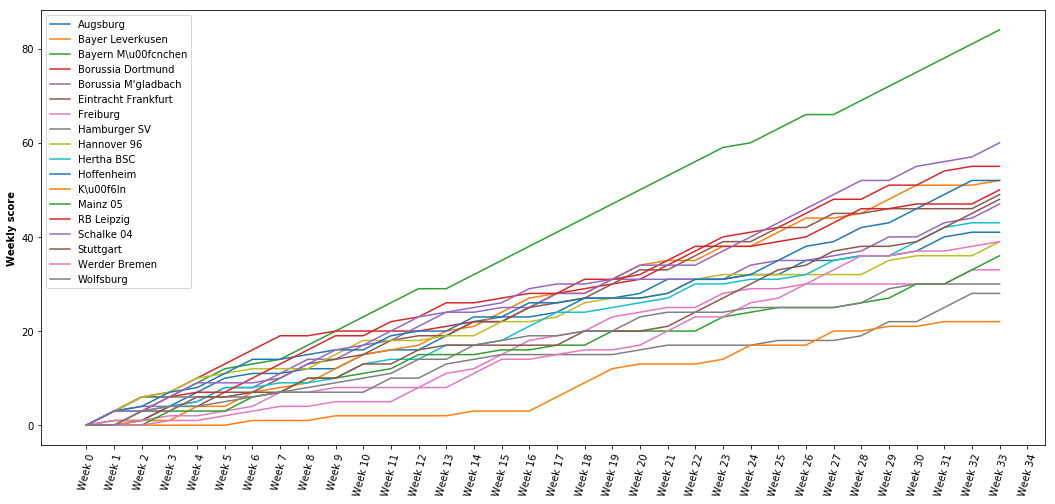

In [34]:
week = (['Week %i' %i for i in range(0, 35)])
week
plt.figure(figsize=(18,8))
fig=plt.plot(week,table_ger)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ger.columns,loc='upper left',fontsize='medium')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [35]:
rest={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    

In [36]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
2,Bayern M\u00fcnchen,10
14,Schalke 04,6
3,Borussia Dortmund,4
15,Stuttgart,4
13,RB Leipzig,4
0,Augsburg,3
10,Hoffenheim,3
16,Werder Bremen,3
11,K\u00f6ln,3
12,Mainz 05,2


In [38]:
result={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [39]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
6,Freiburg,5
8,Hannover 96,5
11,K\u00f6ln,5
4,Borussia M'gladbach,4
7,Hamburger SV,4
15,Stuttgart,4
17,Wolfsburg,3
3,Borussia Dortmund,3
5,Eintracht Frankfurt,3
12,Mainz 05,3


### From the data and the plot we can see that the team which has the longest winning streak is Bayern M\u00fcnchen	. Bayern M\u00fcnchen made a winning chain of 10 matches. On the other hand, the  team with highest losing streak is Freiburg.

# ${\bullet}$Analysis for Serie A

### Information needed: Teams and matches related to Italy

In [93]:
#As this is Serie A, we need information solely based on Italy.
team_ita=team[(team['alpha3code']=='ITA')&(team['type']=='club')]
team_ita

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
18,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,club,Italy,380,ITA,IT
34,Milano,Milan,3157,AC Milan,club,Italy,380,ITA,IT
36,Torino,Juventus,3159,Juventus FC,club,Italy,380,ITA,IT
37,Roma,Roma,3158,AS Roma,club,Italy,380,ITA,IT
38,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,club,Italy,380,ITA,IT
47,Bologna,Bologna,3166,Bologna FC 1909,club,Italy,380,ITA,IT
49,Genova,Sampdoria,3164,UC Sampdoria,club,Italy,380,ITA,IT
50,Verona,Chievo,3165,AC Chievo Verona,club,Italy,380,ITA,IT
51,Formello,Lazio,3162,SS Lazio,club,Italy,380,ITA,IT
52,Udine,Udinese,3163,Udinese Calcio,club,Italy,380,ITA,IT


In [94]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ita=team_ita.reset_index(drop=True)
team_ita

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,club,Italy,380,ITA,IT
1,Milano,Milan,3157,AC Milan,club,Italy,380,ITA,IT
2,Torino,Juventus,3159,Juventus FC,club,Italy,380,ITA,IT
3,Roma,Roma,3158,AS Roma,club,Italy,380,ITA,IT
4,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,club,Italy,380,ITA,IT
5,Bologna,Bologna,3166,Bologna FC 1909,club,Italy,380,ITA,IT
6,Genova,Sampdoria,3164,UC Sampdoria,club,Italy,380,ITA,IT
7,Verona,Chievo,3165,AC Chievo Verona,club,Italy,380,ITA,IT
8,Formello,Lazio,3162,SS Lazio,club,Italy,380,ITA,IT
9,Udine,Udinese,3163,Udinese Calcio,club,Italy,380,ITA,IT


#### Import the matches data for Italy

In [95]:
matches_ita= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Italy.json')
pd.set_option('display.max_columns', 14)
matches_ita

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4406278,1,"{'3315': {'scoreET': 0, 'coachId': 261661, 'si...",181248,2017-08-20 18:45:00,0,MAPEI Stadium - Citt\u00e0 del Tricolore,2575967,"Sassuolo - Genoa, 0 - 0","August 20, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 377233, 'role': 'referee'}, {'r...",Regular,524
376,Played,4406278,1,"{'3165': {'scoreET': 0, 'coachId': 21603, 'sid...",181248,2017-08-20 18:45:00,3165,Dacia Arena,2575968,"Udinese - Chievo, 1 - 2","August 20, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524
377,Played,4406278,1,"{'3172': {'scoreET': 0, 'coachId': 210116, 'si...",181248,2017-08-20 16:00:00,3158,Stadio Atleti Azzurri d'Italia,2575959,"Atalanta - Roma, 0 - 1","August 20, 2017 at 6:00:00 PM GMT+2","[{'refereeId': 377248, 'role': 'referee'}, {'r...",Regular,524
378,Played,4406278,1,"{'3194': {'scoreET': 0, 'coachId': 270032, 'si...",181248,2017-08-19 18:45:00,3187,Stadio Marc'Antonio Bentegodi,2575962,"Hellas Verona - Napoli, 1 - 3","August 19, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 377252, 'role': 'referee'}, {'r...",Regular,524


In [96]:
results_ita = matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ita
# results.columns = ['result_home','result_away']
results_ita = pd.concat([matches_ita['gameweek'],results_ita,matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ita.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ita

,gameweek,goal_home,goal_away,team_home,team_away
0,38,2,3,Lazio,Internazionale
1,38,0,1,Sassuolo,Roma
2,38,1,0,Cagliari,Atalanta
3,38,1,0,Chievo,Benevento
4,38,1,0,Udinese,Bologna
...,...,...,...,...,...
375,1,0,0,Sassuolo,Genoa
376,1,1,2,Udinese,Chievo
377,1,0,1,Atalanta,Roma
378,1,1,3,Hellas Verona,Napoli


In [97]:
results_ita['points_home'] = 0
results_ita['points_away'] = 0
for i in range(results_ita.shape[0]):
    if results_ita.loc[i,'goal_home']>results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_home']=3
    elif results_ita.loc[i,'goal_home']<results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_away']=3
    else:
        results_ita.loc[i,'points_home']=1
        results_ita.loc[i,'points_away']=1

In [98]:
home = results_ita[['gameweek','team_home','points_home']]
away = results_ita[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ita = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ita

,gameweek,team,points
0,1,Atalanta,0
1,1,Benevento,0
2,1,Bologna,1
3,1,Cagliari,0
4,1,Chievo,3
...,...,...,...
755,38,SPAL,3
756,38,Sampdoria,0
757,38,Sassuolo,0
758,38,Torino,3


In [104]:
team_list = list(points_table_ita.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ita.loc[(points_table_ita['gameweek']==week)&(points_table_ita['team']==team),'points'])
table_ita=points_byweek
table_ita=table_ita.sort_values(by=(38),ascending=False)
table_ita=table_ita.T
pd.set_option('display.max_columns', 20)
table_ita

,Juventus,Napoli,Roma,Internazionale,Lazio,Milan,Atalanta,Fiorentina,Sampdoria,Torino,Sassuolo,Genoa,Chievo,Udinese,Cagliari,Bologna,SPAL,Crotone,Hellas Verona,Benevento
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,3,3,3,1,3,0,0,3,1,1,1,3,0,0,1,1,0,0,0
2,6,6,3,6,4,6,0,0,6,4,1,1,3,0,0,4,4,1,1,0
3,9,9,4,9,7,6,3,3,7,7,1,1,3,3,3,4,4,1,1,0
4,12,12,7,12,10,9,4,6,8,8,1,1,4,3,6,4,4,1,1,0
5,15,15,10,13,10,12,7,6,9,11,4,2,5,3,6,5,4,1,2,0
6,18,18,13,16,13,12,8,7,12,11,4,2,8,3,6,8,4,4,2,0
7,19,21,16,19,16,12,9,7,12,12,4,2,11,6,6,11,5,5,3,0
8,19,24,16,22,19,12,9,10,15,13,5,5,12,6,6,14,5,6,6,0
9,22,25,19,23,22,13,12,13,18,13,8,6,15,6,6,14,5,6,6,0


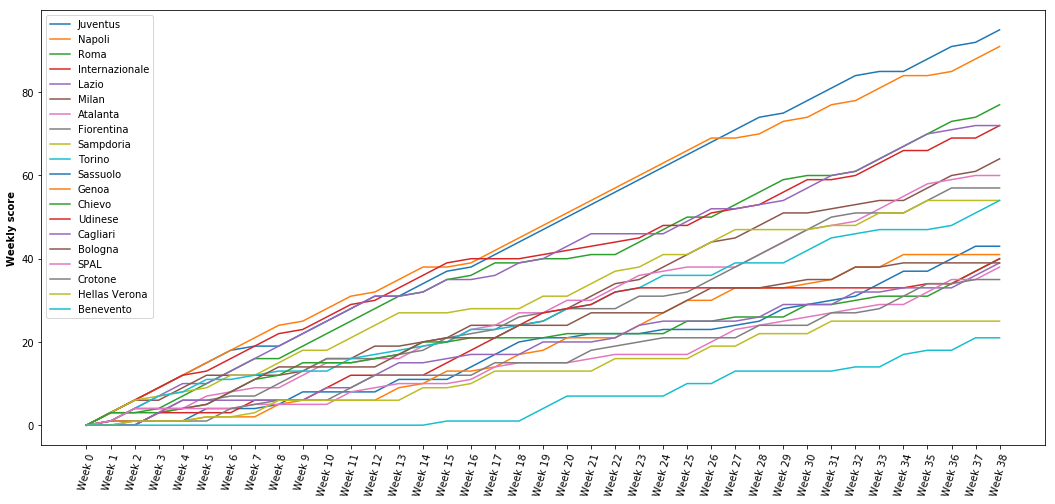

In [105]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,8))
fig=plt.plot(week,table_ita)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ita.columns,loc='upper left',fontsize='medium')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [106]:
rest={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [81]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
10,Juventus,12
13,Napoli,10
11,Lazio,7
6,Fiorentina,6
14,Roma,5
19,Udinese,5
9,Internazionale,4
7,Genoa,3
12,Milan,3
2,Bologna,3


In [82]:
result={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [83]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
1,Benevento,14
19,Udinese,11
3,Cagliari,5
8,Hellas Verona,5
15,SPAL,4
2,Bologna,4
4,Chievo,4
5,Crotone,4
7,Genoa,3
17,Sassuolo,3


### From the data and the plot we can see that the team which has the longest winning streak is Juventas. Juventas made a winning chain of 12 matches. On the other hand, the  team with highest losing streak is Benevento.

# ${\bullet}$Analysis for League 1

### Information needed: Teams and matches related to France

In [61]:
#As this is League 1, we need information solely based on France.
team_fra=team[(team['alpha3code']=='FRA')&(team['type']=='club')]
team_fra

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
11,Lyon,Olympique Lyonnais,3766,Olympique Lyonnais,club,France,250,FRA,FR
12,Paris,PSG,3767,Paris Saint-Germain FC,club,France,250,FRA,FR
20,Marseille,Olympique Marseille,3771,Olympique de Marseille,club,France,250,FRA,FR
21,La Chapelle-sur-Erdre,Nantes,3770,FC Nantes,club,France,250,FRA,FR
22,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,club,France,250,FRA,FR
23,Rennes,Rennes,3774,Stade Rennais FC,club,France,250,FRA,FR
24,Strasbourg,Strasbourg,3779,RC Strasbourg Alsace,club,France,250,FRA,FR
35,Angers,Angers,3799,Angers SCO,club,France,250,FRA,FR
40,Le Haillan,Bordeaux,3772,FC Girondins de Bordeaux,club,France,250,FRA,FR


#### Import the matches data for France

In [62]:
matches_fra= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_France.json')
pd.set_option('display.max_columns', 14)
matches_fra

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405655,38,"{'3783': {'scoreET': 0, 'coachId': 210513, 'si...",181189,2018-05-19 19:00:00,0,Stade Michel d'Ornano,2501056,"Caen - PSG, 0 - 0","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 384954, 'role': 'referee'}, {'r...",Regular,412
1,Played,4405655,38,"{'3804': {'scoreET': 0, 'coachId': 220743, 'si...",181189,2018-05-19 19:00:00,0,Stade Gaston-G\u00e9rard,2501057,"Dijon - Angers SCO, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412
2,Played,4405655,38,"{'3766': {'scoreET': 0, 'coachId': 211238, 'si...",181189,2018-05-19 19:00:00,3766,Groupama Stadium,2501058,"Olympique Lyonnais - Nice, 3 - 2","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 386297, 'role': 'referee'}, {'r...",Regular,412
3,Played,4405655,38,"{'3771': {'scoreET': 0, 'coachId': 25691, 'sid...",181189,2018-05-19 19:00:00,3771,Stade V\u00e9lodrome,2501059,"Olympique Marseille - Amiens SC, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385529, 'role': 'referee'}, {'r...",Regular,412
4,Played,4405655,38,"{'3772': {'scoreET': 0, 'coachId': 9092, 'side...",181189,2018-05-19 19:00:00,3772,Stade Saint-Symphorien,2501060,"Metz - Bordeaux, 0 - 4","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385796, 'role': 'referee'}, {'r...",Regular,412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405655,1,"{'3783': {'scoreET': 0, 'coachId': 210513, 'si...",181189,2017-08-05 18:00:00,3787,Stade de la Mosson,2500692,"Montpellier - Caen, 1 - 0","August 5, 2017 at 8:00:00 PM GMT+2","[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412
376,Played,4405655,1,"{'3782': {'scoreET': 0, 'coachId': 218066, 'si...",181189,2017-08-05 18:00:00,3782,Stade Geoffroy-Guichard,2500694,"Saint-\u00c9tienne - Nice, 1 - 0","August 5, 2017 at 8:00:00 PM GMT+2","[{'refereeId': 385528, 'role': 'referee'}, {'r...",Regular,412
377,Played,4405655,1,"{'3795': {'scoreET': 0, 'coachId': 25606, 'sid...",181189,2017-08-05 18:00:00,0,Stade de l'Aube,2500695,"Troyes - Rennes, 1 - 1","August 5, 2017 at 8:00:00 PM GMT+2","[{'refereeId': 386325, 'role': 'referee'}, {'r...",Regular,412
378,Played,4405655,1,"{'3789': {'scoreET': 0, 'coachId': 26812, 'sid...",181189,2017-08-05 15:15:00,3767,Parc des Princes,2500693,"PSG - Amiens SC, 2 - 0","August 5, 2017 at 5:15:00 PM GMT+2","[{'refereeId': 381847, 'role': 'referee'}, {'r...",Regular,412


In [63]:
results_fra = matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_fra
# results.columns = ['result_home','result_away']
results_fra = pd.concat([matches_fra['gameweek'],results_fra,matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_fra.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_fra

,gameweek,goal_home,goal_away,team_home,team_away
0,38,0,0,Caen,PSG
1,38,2,1,Dijon,Angers SCO
2,38,3,2,Olympique Lyonnais,Nice
3,38,2,1,Olympique Marseille,Amiens SC
4,38,0,4,Metz,Bordeaux
...,...,...,...,...,...
375,1,1,0,Montpellier,Caen
376,1,1,0,Saint-\u00c9tienne,Nice
377,1,1,1,Troyes,Rennes
378,1,2,0,PSG,Amiens SC


In [64]:
results_fra['points_home'] = 0
results_fra['points_away'] = 0
for i in range(results_fra.shape[0]):
    if results_fra.loc[i,'goal_home']>results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_home']=3
    elif results_fra.loc[i,'goal_home']<results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_away']=3
    else:
        results_fra.loc[i,'points_home']=1
        results_fra.loc[i,'points_away']=1

In [65]:
home = results_fra[['gameweek','team_home','points_home']]
away = results_fra[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_fra = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_fra

,gameweek,team,points
0,1,Amiens SC,0
1,1,Angers SCO,1
2,1,Bordeaux,1
3,1,Caen,0
4,1,Dijon,0
...,...,...,...
755,38,Rennes,1
756,38,Saint-\u00c9tienne,3
757,38,Strasbourg,0
758,38,Toulouse,3


In [107]:
team_list = list(points_table_fra.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_fra.loc[(points_table_fra['gameweek']==week)&(points_table_fra['team']==team),'points'])
table_fra=points_byweek
table_fra=table_fra.sort_values(by=(38),ascending=False)
table_fra=table_fra.T
pd.set_option('display.max_columns', 18)
table_fra

,PSG,Monaco,Olympique Lyonnais,Olympique Marseille,Rennes,Bordeaux,Saint-\u00c9tienne,Nice,Nantes,...,Guingamp,Amiens SC,Angers SCO,Lille,Caen,Strasbourg,Toulouse,Troyes,Metz
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0
1,3,3,3,3,1,1,3,0,0,...,3,0,1,3,0,0,0,1,0
2,6,6,6,6,1,4,6,0,0,...,3,0,4,3,0,3,3,4,0
3,9,9,7,7,2,5,9,3,3,...,3,0,5,3,3,4,3,4,0
4,12,12,8,7,2,8,9,3,4,...,6,3,6,4,6,4,6,4,0
5,15,12,11,7,5,9,10,6,7,...,6,6,7,5,9,4,7,5,0
6,18,15,11,10,5,12,13,9,10,...,9,6,7,5,9,4,7,5,3
7,19,18,12,13,6,15,14,10,13,...,9,6,8,5,12,4,7,8,3
8,22,19,13,16,6,15,14,10,16,...,10,9,9,5,15,5,8,11,3
9,25,19,16,17,6,16,17,10,17,...,13,9,12,6,15,6,11,12,3


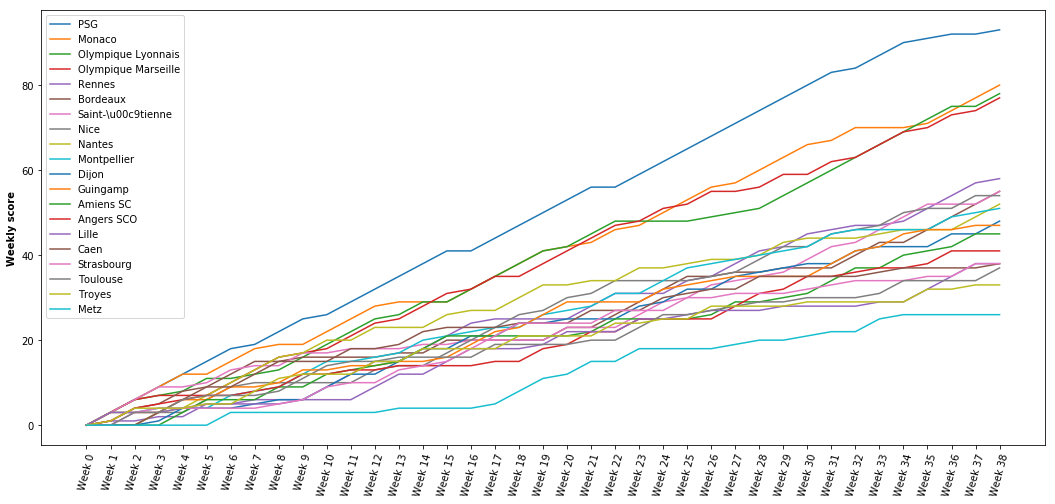

In [108]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,8))
fig=plt.plot(week,table_fra)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_fra.columns,loc='upper left',fontsize='medium')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [109]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [110]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
14,PSG,9
12,Olympique Lyonnais,8
10,Nantes,4
13,Olympique Marseille,4
2,Bordeaux,4
8,Monaco,4
11,Nice,4
3,Caen,3
17,Strasbourg,3
6,Lille,3


In [111]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [112]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
7,Metz,6
0,Amiens SC,5
17,Strasbourg,4
11,Nice,4
19,Troyes,4
3,Caen,4
2,Bordeaux,4
5,Guingamp,3
6,Lille,3
9,Montpellier,3


### From the data and the plot we can see that the team which has the longest winning streak is PSG. PSG made a winning chain of 9 matches. On the other hand, the  team with highest losing streak is Metz.

# ${\bullet}$Compilation of the results obtained from all the leagues and observing the differences.
#### Note, this comparative analysis is completely basd on the [RQ1]

From the datasets, i.e. the leagues and the teams, we analysed five leagues, viz. the premier league, the La Liga, the Bundesliga, the Serie A and League 1. We can observe that all the leagues mentioned above are mutually exclusive in nature, that is, there is no team which can participate in more than one league simultaneously. More, the leagues are organised on country basis. So, the teams can participate according to their geographical terrirory. For example, being situated in the UK, Manchester United participates in the Premier league, not in any other league. 
Here, we will try to establish a table which will show us the basis similarities and disimilarities between the summary data obtained from the analysis of the leagues.

In [113]:
df= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 'country': ['England & Wales', 'Spain','Germany','Italy', 'France']
    ,'Weeks':[38,38,34,38,38],'Longest winning streak':[19,8,10,12,9],'Longest losing streak':[8,8,5,14,4]}
df=pd.DataFrame(df)
df

,League_name,country,Weeks,Longest winning streak,Longest losing streak
0,Premier league,England & Wales,38,19,8
1,La Liga,Spain,38,8,8
2,Bundesliga,Germany,34,10,5
3,Serie A,Italy,38,12,14
4,League 1,France,38,9,4
